我们将使用Python的内置wave库。在这里我们设置参数.
- `nframes`是帧数或样本数.
- `comptype`和`compname`都表示同样的事情：数据未压缩.
- `nchannels`是通道数，即1.
- `sampwidth`是以字节为单位的样本宽度。正如我前面提到的，波形文件通常是每个样本16位或2个字节

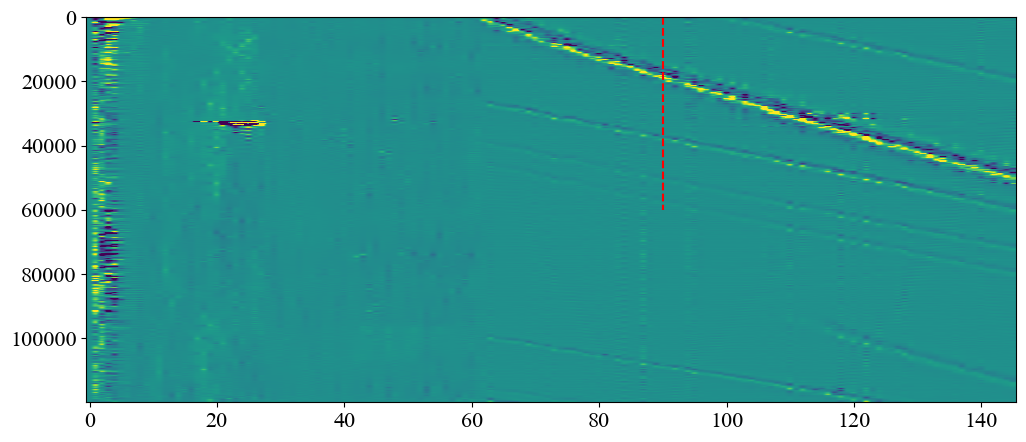

In [2]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt

import wave                           # to write the voice file
import struct
from pydub import AudioSegment        # to read the voice file
from pydub.playback import play       # to play the voice

from readdat import readdat

path = pathlib.Path('/Users/zhiyuzhang/MyProjects/dasQt/examples/')
DAS_file = path / '2024-01-31-19-30-35-out.dat'
data, dt, dx, nt, nx = readdat(DAS_file)

# transform DAS data to voice
num_samples = 60000
trace       = 90
sine_wave   = list(data[:num_samples, trace])


# 设置字体为Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size']   = 16
fig, ax = plt.subplots(1, 1, figsize=(12.0, 5))

ax.imshow(data[:, :], aspect='auto', origin='lower',vmin=-0.01, vmax=0.01)
ax.vlines(trace, 0, num_samples, colors='r', linestyles='dashed')
ax.invert_yaxis()  


#sampling_rate = 1000
nframes       = num_samples         # 采样点数
sampling_rate = nframes / 20        # 采样频率
comptype      = "NONE"              # 压缩类型
compname      = "not compressed"    # 压缩名称
nchannels     = 1                   # 声道数
sampwidth     = 2                   # 量化位数
file           = 'DAS.wav'           # 输出文件
amplitude     = 100000              # 振幅

wav_file = wave.open(file, 'w')
wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes, comptype, compname))
for s in sine_wave:
   wav_file.writeframes(struct.pack('h', int(s*amplitude)))

struct.pack('h', int(s*amplitude))



## read and play whale's voice
song = AudioSegment.from_wav("DAS.wav")
#song -= 100  # lower the volume
song -= 5
song


